# Association Rule Mining with Apriori

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Goal 

This project uses an association analysis to identify frequent item sets in transactions at a British bakery. Those itemsets will then be used to recommend an actionable business insight to the bakery. 

## Data Collection 

The dataset to be analyzed is from "The Bread Basket", a bakery located in Edinburgh.

In [2]:
df_breadbasket = pd.read_csv('https://gist.githubusercontent.com/GregKuhlmann/1605ab44ac19c7edea5501d7a2dcc122/raw/1ad3ac582646a5389ea022e7d0e8e43686f3ffec/BreadBasket.csv')
df_breadbasket.head(5)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## Data Analysis

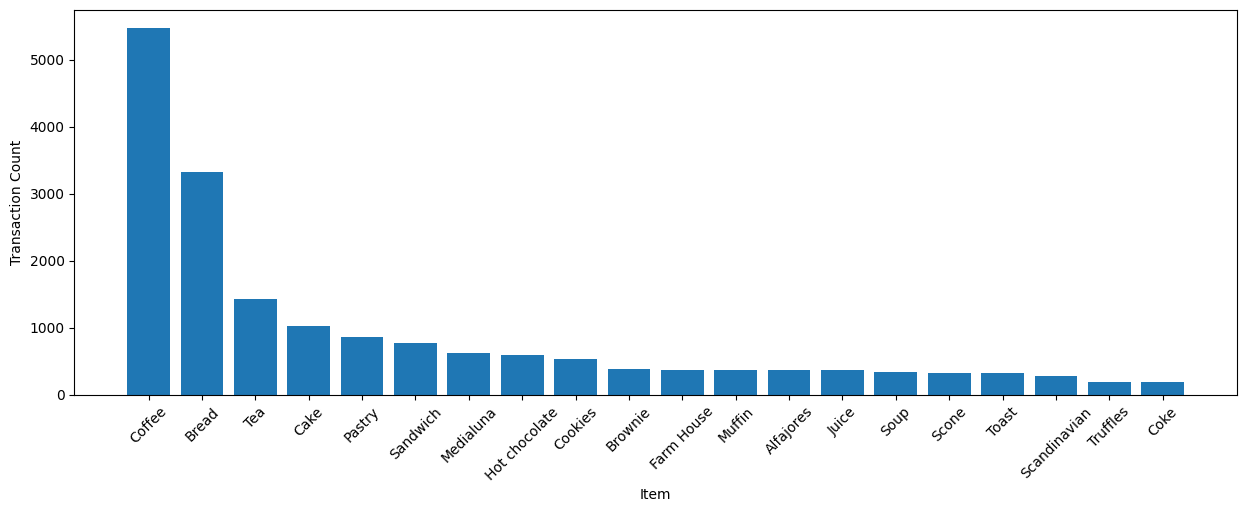

In [3]:
df_breadbasket = df_breadbasket[df_breadbasket['Item'] != 'NONE']
hist = df_breadbasket.Item.value_counts().head(20)
plt.figure(figsize = [15,5])
plt.xticks(rotation = 45, fontsize = 10)
plt.bar(hist.index, hist)
plt.xlabel('Item')
plt.ylabel('Transaction Count');

In [4]:
num = df_breadbasket.Item.nunique()
print('There are', str(num), 'unique items.')

There are 94 unique items.


In [5]:
num = df_breadbasket.Transaction.nunique()
print('There are', str(num), 'unique transactions.')

There are 9465 unique transactions.


## Create the Transaction Array Using One Hot Encoding

In [6]:
dataset = df_breadbasket.groupby('Transaction').Item.apply(list)
encoder = TransactionEncoder()
txn_arr = encoder.fit(dataset).transform(dataset)
encoder.inverse_transform(txn_arr[:4])
df = pd.DataFrame(txn_arr, columns = encoder.columns_)
df.head(5)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Create Frequent Itemsets Using the Apriori Method

Minumum support = 20

In [7]:
minsup = 20
itemsets = apriori(df, min_support = minsup/len(df), use_colnames = True)
itemsets.tail(5)

,support,itemsets
239,0.005388,"(Coffee, Sandwich, Tea)"
240,0.002113,"(Coffee, Sandwich, Truffles)"
241,0.003381,"(Coffee, Scone, Tea)"
242,0.002747,"(Soup, Coffee, Tea)"
243,0.003275,"(Coffee, Tea, Toast)"


## Generate Strong Rules

### Metric 1: confidence > 0.5

In [13]:
association_rules(itemsets, metric = 'confidence', min_threshold = 0.5).iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Art Tray),(Coffee),0.004015,0.478394,0.002747,0.684211,1.430224,0.000826,1.651752,0.302021
2,(Bakewell),(Coffee),0.005071,0.478394,0.003064,0.604167,1.262906,0.000638,1.317741,0.209236
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
5,(Extra Salami or Feta),(Coffee),0.004015,0.478394,0.003275,0.815789,1.705267,0.001355,2.831575,0.415249
6,(Frittata),(Coffee),0.008558,0.478394,0.004543,0.530864,1.109680,0.000449,1.111844,0.099692
7,(Hearty & Seasonal),(Coffee),0.010565,0.478394,0.005705,0.540000,1.128777,0.000651,1.133926,0.115303
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Jammie Dodgers),(Coffee),0.013207,0.478394,0.006656,0.504000,1.053525,0.000338,1.051625,0.051485


All of the consequents are coffee, meaning these rules only predict when people will buy coffee. This is because coffee itself is so common in the dataset. This result isn't going to be helpful to the bakery because coffee is the only item they could tailor towards customers.

### Metric 2: lift > 3

In [14]:
association_rules(itemsets, metric = 'lift', min_threshold = 3).iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sandwich),(Coke),0.071844,0.019440,0.005177,0.072059,3.706722,0.003780,1.056705,0.786742
1,(Coke),(Sandwich),0.019440,0.071844,0.005177,0.266304,3.706722,0.003780,1.265043,0.744697
2,(Fudge),(Jam),0.015003,0.015003,0.002536,0.169014,11.265622,0.002311,1.185336,0.925114
3,(Jam),(Fudge),0.015003,0.015003,0.002536,0.169014,11.265622,0.002311,1.185336,0.925114
4,(Juice),(Jammie Dodgers),0.038563,0.013207,0.002113,0.054795,4.149041,0.001604,1.043999,0.789423
5,(Jammie Dodgers),(Juice),0.013207,0.038563,0.002113,0.160000,4.149041,0.001604,1.144568,0.769138
6,(Juice),(Spanish Brunch),0.038563,0.018172,0.002747,0.071233,3.919879,0.002046,1.057130,0.774768
7,(Spanish Brunch),(Juice),0.018172,0.038563,0.002747,0.151163,3.919879,0.002046,1.132652,0.758677
8,(Sandwich),(Mineral water),0.071844,0.014157,0.003275,0.045588,3.220094,0.002258,1.032932,0.742817
9,(Mineral water),(Sandwich),0.014157,0.071844,0.003275,0.231343,3.220094,0.002258,1.207504,0.699351


### Metric 3: leverage > 0.004

In [15]:
association_rules(itemsets, metric = 'leverage', min_threshold = 0.004).iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
2,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
3,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
7,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
8,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161


### Metric 4: conviction > 1.2

In [16]:
association_rules(itemsets, metric = 'conviction', min_threshold = 1.2).iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Art Tray),(Coffee),0.004015,0.478394,0.002747,0.684211,1.430224,0.000826,1.651752,0.302021
1,(Bakewell),(Coffee),0.005071,0.478394,0.003064,0.604167,1.262906,0.000638,1.317741,0.209236
2,(Extra Salami or Feta),(Coffee),0.004015,0.478394,0.003275,0.815789,1.705267,0.001355,2.831575,0.415249
3,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,0.002204,2.738431,0.411783
4,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
5,(Salad),(Coffee),0.010460,0.478394,0.006550,0.626263,1.309094,0.001547,1.395648,0.238608
6,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
7,(Tartine),(Coffee),0.004860,0.478394,0.003064,0.630435,1.317815,0.000739,1.411404,0.242346
8,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
9,(Vegan mincepie),(Coffee),0.005494,0.478394,0.003170,0.576923,1.205958,0.000541,1.232887,0.171727


## Conclusion: Actionable Business Insight 

The most clear result of this analysis is that coffee is by far the most bought item, no matter what else the transaction includes. Based on the fact that customers are very likely to buy coffee when buying anything else, I would suggest the bakery upcharges coffee in order to increase their sales income. I think that customers would continue purchasing the coffee, even if it is a bit more expensive. 